# **Setting of GPU**

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15743, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 15743 (delta 98), reused 148 (delta 81), pack-reused 15537
Receiving objects: 100% (15743/15743), 14.66 MiB | 22.34 MiB/s, done.
Resolving deltas: 100% (10527/10527), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1444:14: warning: unused variable ‘buff’ []8;;https:/

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

# **Monting Google Drive for Data**

In [ ]:
# mounting google drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'1(1)(1) (1).pdf'
'1(1)(1).pdf'
 132012-3130702-DS.pdf
'2000501131079_Tutorial 3_ q 2.26.pdf'
 200050131079
 200050131079_ada.gdoc
 200050131079_CNS.pdf
'200050131079 _Dharti_Batch-B_assignment 1 & 2.pdf'
'200050131079_Dharti_Batch B_BEE Practical (1).pdf'
'200050131079_Dharti_Batch B_BEE Practical (2).pdf'
'200050131079_Dharti_Batch B_BEE Practical (3).pdf'
'200050131079_Dharti_Batch B_BEE Practical.pdf'
'200050131079_Dharti_Batch B_practical set.pdf'
 200050131079_Dharti_sem4.pdf
 200050131079.doc
 200050131079.gdoc
 200050131079.jpg
 200050131079.pdf
'20200805_113228 (1).jpg'
 20200805_113228.jpg
'20CSE025 _Dharti_Batch-B_assign 1 & 2.pdf'
'20CSE025 _Dharti_Batch-B_assign1.pdf'
'20CSE025 _Dharti_batch-B_assign 2.pdf'
'20CSE025 _Dharti_Batch B.pdf'
 20CSE025_Dharti_CSE1_B.gdoc
'20CSE025 _DHARTI_CSE-1_B.pdf'
 210050131517_ada.gdoc
'2nd dose dharti.pdf'
'3110018_PHY2_GTU_Study_Material_e-Notes_Unit---4_15032021082835AM (1).pdf'
'5th sem fee.pdf'
'7th sem - internship 2023- guide alloca

In [ ]:
!ls /mydrive/Agriculture

backup	       crop_weed_detection.ipynb  obj.data   test
crop_weed.cfg  generate_train.py	  obj.names


# **Downloading dataset**

Please follow the steps below to download and use kaggle data within Google Colab:

Go to you kaggle > account, Scroll to API section and Click Expire API Token(if you have created previously) to remove previous tokens

Click on Create New API Token - It will download kaggle.json file on your machine.

Now just run bellow cell.

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

# Upload kaggle.json
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"dicku2512","key":"a422a843980a658a5e83c52dcbbd2564"}'}

In [ ]:
# Create the .kaggle directory
!mkdir -p /root/.kaggle/
# Move kaggle.json to /root/.kaggle/
!mv kaggle.json /root/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023          Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           5180        164  1.0              
joebeachcapital/students-performance             Students Performance                             2KB  2023-08-31 00:50:11           1444         36  1.0              
nelgiriyewithana/global-youtube-statistics-2023  Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          16137        536  1.0              
iamsouravbanerjee/airline-dataset                Airline Dataset                                  4MB  2023-08-30 12:03:12           2317         66  1.0       

In [ ]:
!kaggle datasets download -d ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes

 72% 57.0M/79.2M [00:01<00:00, 47.9MB/s]
100% 79.2M/79.2M [00:01<00:00, 67.7MB/s]


In [ ]:
%cd darknet

/content/darknet


In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../crop-and-weed-detection-data-with-bounding-boxes.zip -d data/

Archive:  ../crop-and-weed-detection-data-with-bounding-boxes.zip
  inflating: data/agri_data/data/agri_0_1009.jpeg  
  inflating: data/agri_data/data/agri_0_1009.txt  
  inflating: data/agri_data/data/agri_0_1017.jpeg  
  inflating: data/agri_data/data/agri_0_1017.txt  
  inflating: data/agri_data/data/agri_0_1018.jpeg  
  inflating: data/agri_data/data/agri_0_1018.txt  
  inflating: data/agri_data/data/agri_0_1020.jpeg  
  inflating: data/agri_data/data/agri_0_1020.txt  
  inflating: data/agri_data/data/agri_0_1024.jpeg  
  inflating: data/agri_data/data/agri_0_1024.txt  
  inflating: data/agri_data/data/agri_0_1026.jpeg  
  inflating: data/agri_data/data/agri_0_1026.txt  
  inflating: data/agri_data/data/agri_0_1028.jpeg  
  inflating: data/agri_data/data/agri_0_1028.txt  
  inflating: data/agri_data/data/agri_0_1041.jpeg  
  inflating: data/agri_data/data/agri_0_1041.txt  
  inflating: data/agri_data/data/agri_0_1053.jpeg  
  inflating: data/agri_data/data/agri_0_1053.txt  
  infla

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/Agriculture/crop_weed.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/Agriculture/obj.names ./data
!cp /mydrive/Agriculture/obj.data  ./data

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/Agriculture/generate_train.py ./

In [ ]:
!python generate_train.py

In [ ]:
# train.txt file should have to here.
!ls data/agri_data

data  train.txt


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2023-09-10 15:50:31--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2023-09-10 15:50:31--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   107MB/s    in 1.4s    

2023-09-10 15:50:33 (107 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Training

In [ ]:
# Update the system and install dependencies
!sudo apt update
!sudo apt upgrade -y
!sudo apt install build-essential dkms -y

# Replace <version> with the appropriate CUDA version you want to install, e.g., 11.4
cuda_version = "11.4"

# Download and install CUDA Toolkit
cuda_repo_url = f"http://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-{cuda_version}_amd64.deb"
!wget $cuda_repo_url
!sudo dpkg -i cuda-{cuda_version}_amd64.deb
!sudo apt-key adv --fetch-keys $cuda_repo_url
!sudo apt update
!sudo apt install cuda -y

# Install cuDNN (Optional): Download cuDNN library from NVIDIA website and follow their installation instructions.

# Set environment variables
cuda_path = '/usr/local/cuda'
!echo 'export PATH=$cuda_path/bin:$PATH' >> ~/.bashrc
!echo 'export LD_LIBRARY_PATH=$cuda_path/lib64:$LD_LIBRARY_PATH' >> ~/.bashrc
!source ~/.bashrc

# Verify CUDA installation
!nvcc --version


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
16 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
C

In [ ]:
#!apt-get update
#!apt-get install build-essential cmake git unzip

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,254 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,230 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,079 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,059 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.c

In [ ]:
#!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15743, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 15743 (delta 98), reused 148 (delta 81), pack-reused 15537
Receiving objects: 100% (15743/15743), 14.66 MiB | 11.49 MiB/s, done.
Resolving deltas: 100% (10527/10527), done.


In [ ]:
#%cd darknet

/darknet


In [ ]:
#!sed -i 's/GPU=1/GPU=0/' Makefile
#!sed -i 's/CUDNN=1/CUDNN=0/' Makefile

In [ ]:
#!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-variable-Wunused-variable]8;;]
  253 |                 int n = _write(client, outputbuf, outlen);
      |                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:867:27: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::v

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/crop_weed.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 7976, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.194267), count: 2, class_loss = 6.162315, iou_loss = 2.634190, total_loss = 8.796505 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 4.123960, iou_loss = 0.000000, total_loss = 4.123960 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 3.598249, iou_loss = 0.000000, total_loss = 3.598249 
 total_bbox = 7978, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.363947), count: 2, class_loss = 6.342068, iou_loss = 1.958853, total_loss = 8.300921 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 4.149140, iou_loss = 0.000000, total_loss = 4.149140 
v3 (mse lo

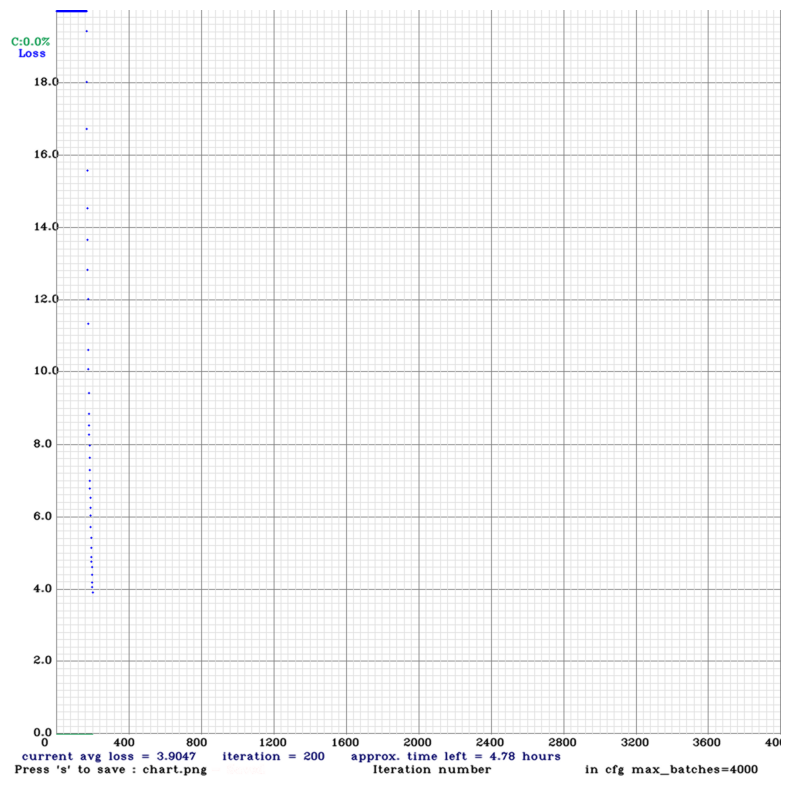

In [ ]:
imShow('chart.png')

# Testing

In [ ]:
# need to set our custom cfg to test mode
%cd cfg
!sed -i 's/batch=32/batch=1/' crop_weed.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' crop_weed.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
!ls /mydrive/Agriculture/test

crop_1.jpeg  crop_3.jpeg  weed_1.jpeg  weed_3.jpeg  weed_5.jpeg
crop_2.jpeg  crop_4.jpeg  weed_2.jpeg  weed_4.jpeg  weed_6.jpeg


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/crop_weed.cfg /content/gdrive/MyDrive/Agriculture/backup/crop_weed_last.weights /mydrive/Agriculture/test/weed_1.jpeg  -thresh 0.3

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5,  

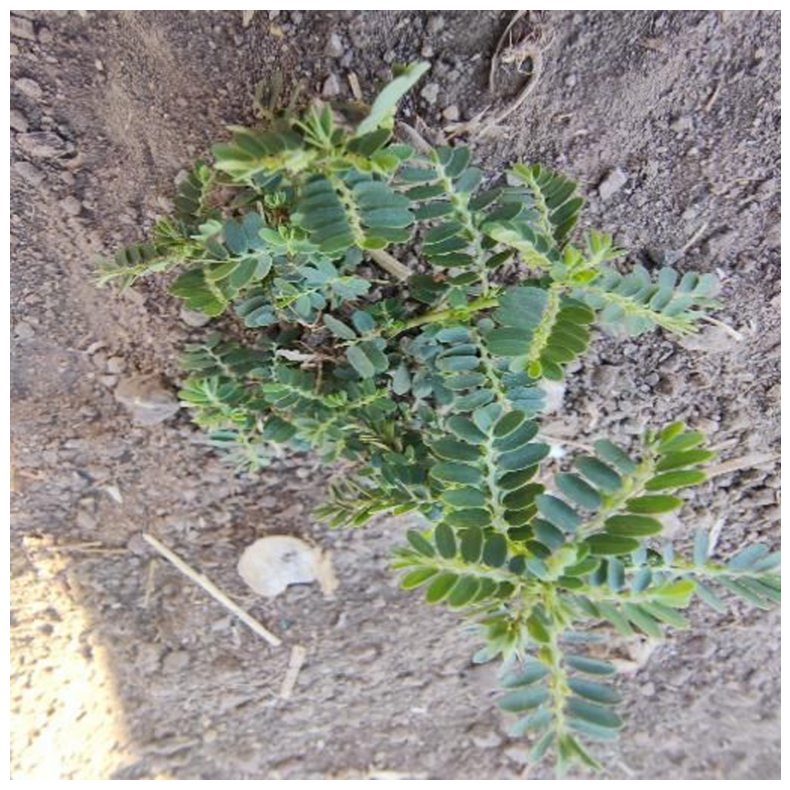

In [ ]:
imShow('predictions.jpg')